In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

In [9]:
plt.rcParams['figure.figsize'] = [16, 8]

In [176]:
df = pd.read_table('dco_pex_step.txt', sep='\s+')
df = df[df['TIME'] <= 2e-9]
t = df['TIME'].to_numpy()
clk = [df[f'wclk{n}'].to_numpy() for n in range(5)]

In [177]:
df.keys()

Index(['TIME', 'wclk4', 'wclk0', 'wclk1', 'wclk2', 'wclk3', 'wctl2'], dtype='object')

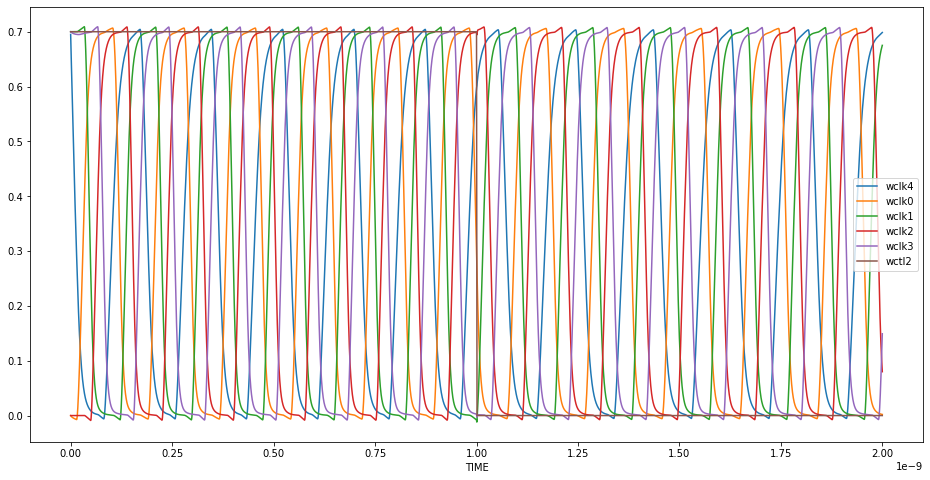

In [178]:
df.plot(x='TIME')

In [179]:
zero_crossings = np.where(np.diff(df['wclk0'] > 0.35))[0]
zero_crossings

array([ 192,  695, 1151, 1595, 2052, 2496, 2957, 3401, 3858, 4302, 4759,
       5203, 5874, 6321, 6779, 7226, 7684, 8135, 8593, 9040, 9498, 9945])

In [180]:
def zero_crossings(t: np.ndarray, v: np.ndarray):
    ''' Linearly-interpolated zero-crossings, and their indices '''
    tidx = np.where(np.diff(np.sign(v)))[0]
    t = t[tidx] + v[tidx] * (t[tidx+1]-t[tidx]) / (v[tidx+1]-v[tidx])
    return tidx, t

zc = zero_crossings(t, clk[0] - 0.35)
zc

(array([ 192,  695, 1151, 1595, 2052, 2496, 2957, 3401, 3858, 4302, 4759,
        5203, 5874, 6321, 6779, 7226, 7684, 8135, 8593, 9040, 9498, 9945]),
 array([3.16595927e-11, 1.19677300e-10, 2.08216975e-10, 2.95169766e-10,
        3.83870732e-10, 4.70821537e-10, 5.59535396e-10, 6.46494959e-10,
        7.35185221e-10, 8.22138255e-10, 9.10839189e-10, 9.97789631e-10,
        1.09424604e-09, 1.18910416e-09, 1.28512819e-09, 1.38014560e-09,
        1.47615051e-09, 1.57113462e-09, 1.66721405e-09, 1.76221607e-09,
        1.85823056e-09, 1.95325563e-09]))

In [181]:
def periods(zcs):
    ''' Periods from rising & falling zero-crossings '''
    return zcs[2:] - zcs[:-2]

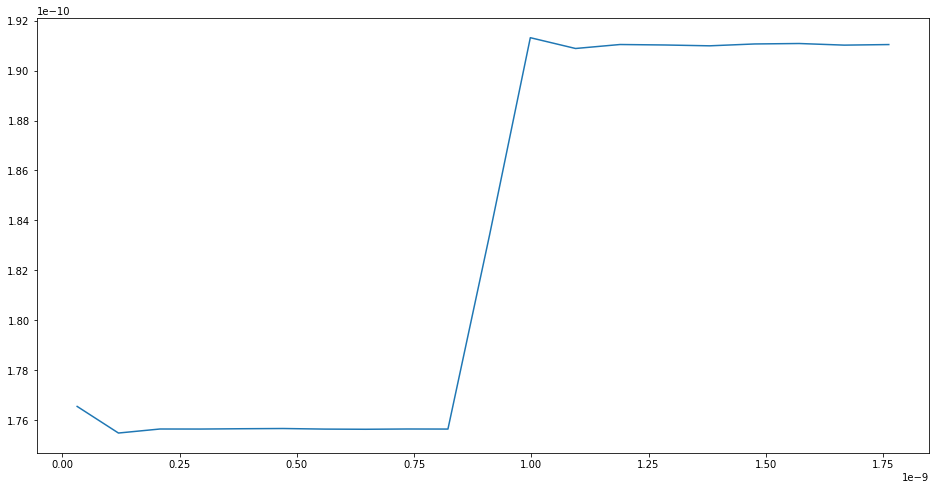

In [182]:
plt.plot(t[zc[0][:-2]], periods(zc[1]))

In [268]:
for n in range(5):
    zc = zero_crossings(t, clk[n] - 0.35)
    plt.plot(t[zc[0][:-2]], periods(zc[1]), marker='*', label=f'clk{n}')
# plt.plot(df['TIME'], (0.7-df['wctl2'])/0.5e11 + 1.75e-10)
plt.legend()

IndexError: invalid index to scalar variable.

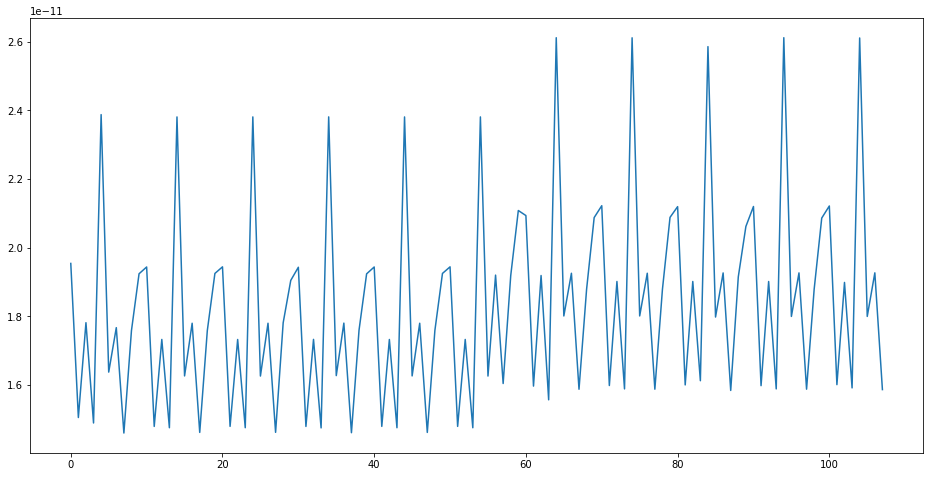

In [199]:
zcs = [zero_crossings(t, clk[n] - 0.35)[1] for n in range(5)]
zcs = np.sort(np.concatenate(zcs, axis=0))
plt.plot(np.diff(zcs))

In [227]:
stages = []
for k in range(10): stages.append([])

for k, t in enumerate(np.diff(zcs[-100:])):
    stages[k%10].append(t)
    
for k in range(10):
    plt.plot(stages[k] / stages[k][0])

TypeError: unsupported operand type(s) for -: 'list' and 'list'

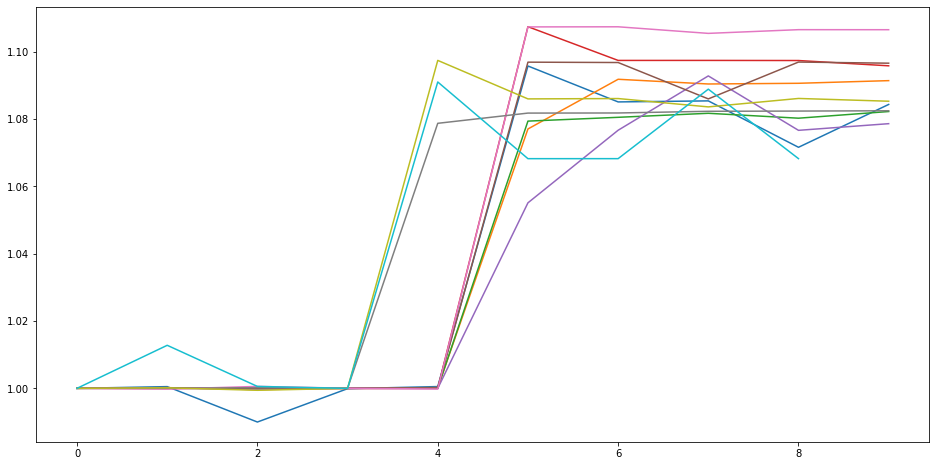

In [264]:
zcs = [[1.189790482656e-11, 1.189790482656e-11, 1.000993630475e-10, 1.830577978978e-10, 2.702250200859e-10, 3.531813251741e-10, 4.403485598239e-10, 5.233029600318e-10, 6.10470223701e-10, 6.934265287821e-10, 7.805937634318e-10, 8.635500683321e-10, 9.507173029889e-10, 1.036841555975e-09, 1.131715026303e-09, 1.221976097969e-09, 1.316817591142e-09, 1.407078665671e-09, 1.501920133956e-09, 1.59217880737e-09, 1.68702028586e-09, 1.777281353639e-09, 1.872122838995e-09, 1.962383886442e-09], [3.084555498451e-11, 3.084555498451e-11, 1.160564478216e-10, 2.018125247447e-10, 2.861809571803e-10, 3.719360499456e-10, 4.563044976031e-10, 5.420577441329e-10, 6.264261608111e-10, 7.121812535535e-10, 7.9654970121e-10, 8.823047931103e-10, 9.666732407671e-10, 1.057261270808e-09, 1.14910564155e-09, 1.242377536387e-09, 1.334208211264e-09, 1.427480099352e-09, 1.519308205608e-09, 1.61258023497e-09, 1.704410898736e-09, 1.797682790576e-09, 1.88951346043e-09, 1.982785319463e-09], [4.531123689177e-11, 4.531123689177e-11, 1.332855448175e-10, 2.160042189548e-10, 3.03409397174e-10, 3.861277443391e-10, 4.735329366268e-10, 5.562494371561e-10, 6.436546007697e-10, 7.263729479471e-10, 8.137781402338e-10, 8.964964875038e-10, 9.83901679791e-10, 1.07270200223e-09, 1.167807891244e-09, 1.257805851226e-09, 1.352910459749e-09, 1.442908405839e-09, 1.53801066384e-09, 1.628008544118e-09, 1.723113150505e-09, 1.813111104341e-09, 1.908215703217e-09, 1.998213627115e-09], [6.264290968583e-11, 6.264290968583e-11, 1.47379037092e-10, 2.33050962703e-10, 3.175026602108e-10, 4.031744879654e-10, 4.876261996364e-10, 5.732961697475e-10, 6.577478637972e-10, 7.434196915734e-10, 8.278714032435e-10, 9.135432311305e-10, 9.979949428006e-10, 1.09120381557e-09, 1.183126401652e-09, 1.276306508166e-09, 1.368228969563e-09, 1.461409058177e-09, 1.55332915928e-09, 1.646509203061e-09, 1.738431657293e-09, 1.831611760944e-09, 1.923534199275e-09], [7.698406904223e-11, 7.698406904223e-11, 1.644114786989e-10, 2.471324134015e-10, 3.345350240944e-10, 4.17255942084e-10, 5.046585635652e-10, 5.873776155292e-10, 6.747802277016e-10, 7.575011456921e-10, 8.449037671723e-10, 9.27624685249e-10, 1.016421603369e-09, 1.106509462227e-09, 1.201611249293e-09, 1.291612082019e-09, 1.386713817836e-09, 1.476714628284e-09, 1.57181399896e-09, 1.661814779738e-09, 1.756916505221e-09, 1.846917330227e-09, 1.942019050838e-09], ] 

In [265]:
all_zcs = np.sort(np.concatenate(zcs))[-100:]

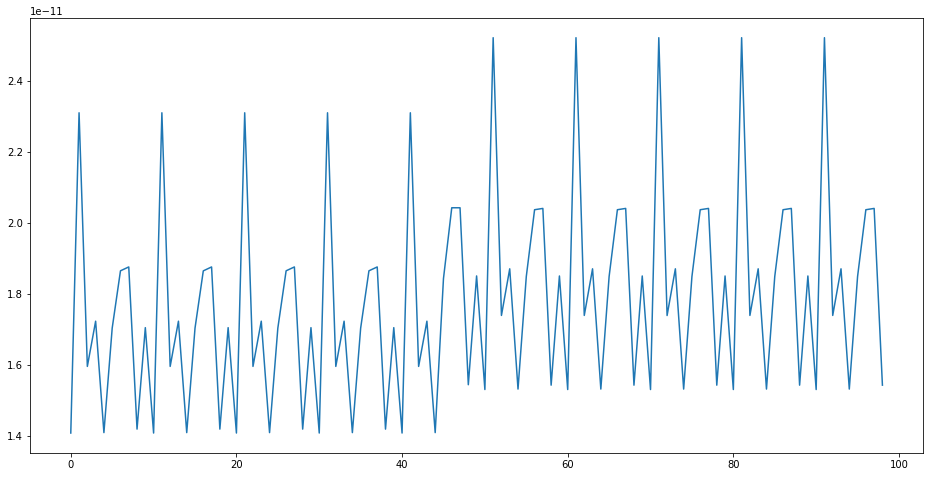

In [266]:
plt.plot(np.diff(all_zcs))

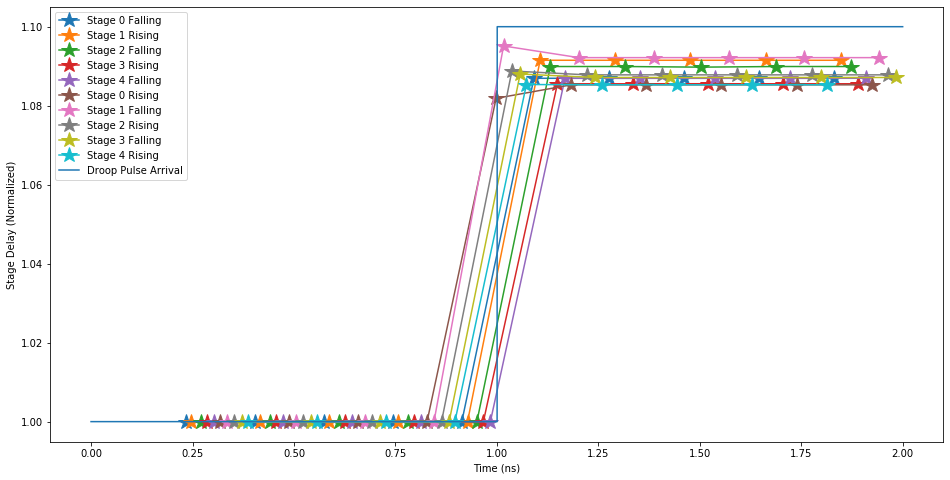

In [271]:
periods = []
for k in range(10): periods.append([])
starts = []
for k in range(10): starts.append([])

all_ts = np.diff(all_zcs)

for k in range(len(all_ts)):
    starts[k%10].append(all_zcs[k])
    periods[k%10].append(all_ts[k])
    
for k in range(10):
    rf = 'Rising' if k%2 else 'Falling'
    plt.plot(np.array(starts[k]) * 1e9, periods[k] / periods[k][0], marker='*', label=f'Stage {k%5} {rf}', markersize=16)

plt.ylabel('Stage Delay (Normalized)')
plt.xlabel('Time (ns)')
plt.plot(df['TIME'] * 1e9, 1.1+-0.1*(df['wctl2'] > 0.35), label='Droop Pulse Arrival')
plt.legend()